In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', None)
%matplotlib inline
color = sns.color_palette()

In [3]:
df_1 = pd.read_excel('RetailPulseAssignmentData.xlsx', sheet_name='Year 2009-2010')

<ipython-input-3-47281b020a76>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df_1 = pd.read_excel('RetailPulseAssignmentData.xlsx', sheet_name='Year 2009-2010')


In [4]:
df_2 = pd.read_excel('RetailPulseAssignmentData.xlsx', sheet_name='Year 2010-2011')

<ipython-input-4-a97ab20a61d9>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df_2 = pd.read_excel('RetailPulseAssignmentData.xlsx', sheet_name='Year 2010-2011')


In [5]:
df = df_1.append(df_2)

In [6]:
print(df_1.shape)
print(df_2.shape)
print(df.shape)

(525461, 8)
(541910, 8)
(1067371, 8)


In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


## First we will begin exploring the variables

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


#### Categorical Features (Nominal) : Invoice , Stock Code, Country, Description , CustomerID
#### Numeric Features : Price, Quantity , InvoiceDate (date time)

In [9]:
#now let us check see the unique products, Customers and transactions
print("Products: "+str(len(df['StockCode'].value_counts())))
print("Transactions: "+str(len(df['Invoice'].value_counts())))
print("Customers: "+str(len(df['Customer ID'].value_counts())))

Products: 5305
Transactions: 53628
Customers: 5942


In [10]:
#now let us look at the number of products purchased per transaction
temp = df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['InvoiceDate'].count()
products_per_transaction = temp.rename(columns = {'InvoiceDate':'Number of products'})
products_per_transaction[:100].sort_values('Customer ID')

,Customer ID,Invoice,Number of products
0,12346.00,491725,1
16,12346.00,C541433,1
15,12346.00,C525274,1
14,12346.00,C525099,1
13,12346.00,C514024,10
12,12346.00,C495800,1
11,12346.00,541431,1
10,12346.00,513774,19
9,12346.00,499763,5
7,12346.00,494450,1


In [11]:
#what can be observed from here is that there are some transactions with C 
#in the beginning of the Invoice. Since the invoice was only a 6 digit number until now,
#but with the C it must mean the transaction was cancelled for some reason

#alse we can see there are customers who purchased only one product

#and there were customers who purchased many products quite frequently



In [12]:
type(products_per_transaction['Invoice'][50])

int

### Order Cancellation analysis

In [13]:
#now let us look at the transactions w.r.t the cancelled orders
products_per_transaction['Invoice'] = products_per_transaction['Invoice'].apply(lambda X:str(X))
products_per_transaction['cancelled_order'] = products_per_transaction['Invoice'].apply(lambda X:int('C' in X))
display(products_per_transaction[:15])

a = products_per_transaction['cancelled_order'].sum()
b = products_per_transaction['cancelled_order'].shape[0]
print('Number of orders cancelled: {}/{} ({:.2f}%) '.format(a, b, a/b*100))

,Customer ID,Invoice,Number of products,cancelled_order
0,12346.00,491725,1,0
1,12346.00,491742,1,0
2,12346.00,491744,1,0
3,12346.00,492718,1,0
4,12346.00,492722,1,0
5,12346.00,493410,1,0
6,12346.00,493412,1,0
7,12346.00,494450,1,0
8,12346.00,495295,1,0
9,12346.00,499763,5,0


Number of orders cancelled: 7901/44876 (17.61%) 


In [14]:
#17% of orders were cancelled, let us seek if there is any relations between the cancelled orders 

In [15]:
display(df.sort_values('Customer ID')[:15])


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
253035,513774,22690,DOORMAT HOME SWEET HOME BLUE,1,2010-06-28 13:53:00,7.49,12346.00,United Kingdom
371779,C525274,TEST001,This is a test product.,-1,2010-10-04 16:33:00,4.50,12346.00,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.00,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.00,United Kingdom
255595,C514024,M,Manual,-1,2010-06-30 11:22:00,142.31,12346.00,United Kingdom
255594,C514024,M,Manual,-1,2010-06-30 11:22:00,31.78,12346.00,United Kingdom
255593,C514024,M,Manual,-4,2010-06-30 11:22:00,13.22,12346.00,United Kingdom
370048,C525099,D,Discount,-1,2010-10-04 09:54:00,1.00,12346.00,United Kingdom
107804,499763,15056P,EDWARDIAN PARASOL PINK,1,2010-03-02 13:08:00,5.95,12346.00,United Kingdom
255592,C514024,M,Manual,-1,2010-06-30 11:22:00,1.15,12346.00,United Kingdom


In [16]:
#in many of these orders for example in the 3rd and 4th rows,
#everything is the same except for the quantity, Invoice (4th has C i.e. Cancelled) and time in the Invoice date
#this might explain the negative quantities

### We must remove cancelled orders now 

In [17]:
x=df.loc[(df['Description'] == 'Discount')& (df['Quantity'] < 0)]
print('No of orders that had discount and had negative quantity: '+ str(len(x)))
print(x)

No of orders that had discount and had negative quantity: 172
        Invoice StockCode Description  Quantity         InvoiceDate   Price  \
735     C489535         D    Discount        -1 2009-12-01 12:11:00    9.00   
736     C489535         D    Discount        -1 2009-12-01 12:11:00   19.00   
24675   C491428         D    Discount        -1 2009-12-10 20:23:00    9.10   
29414   C491845         D    Discount        -1 2009-12-14 14:54:00    1.59   
29958   C491962         D    Discount        -1 2009-12-14 16:38:00    0.59   
39127   C492693         D    Discount        -1 2009-12-17 18:47:00    6.85   
44782   C493373         D    Discount        -1 2009-12-23 11:22:00   64.37   
62231   C494909         D    Discount       -30 2010-01-19 16:45:00    0.40   
62232   C494909         D    Discount       -30 2010-01-19 16:45:00    0.13   
62962   C494984         D    Discount        -1 2010-01-20 11:12:00   70.00   
71812   C495911         D    Discount        -1 2010-01-27 12:48:00  

In [18]:
#creating a copy of our dataset which would have been cleaned from duplicate cancelled orders
clean_df = df.copy(deep = True)


In [19]:
clean_df = clean_df.loc[(clean_df['Quantity'] > 0)]

In [20]:
clean_df = clean_df.loc[(clean_df['Price'] >= 0)]

In [21]:
clean_df.shape

(1044416, 8)

In [22]:
# Creating a column to view the total price of every purchase
clean_df['Total_Price'] = clean_df['Price'] * (clean_df['Quantity'])

In [23]:
#Since every row of the dataframe indicates prizes for a single kind of product. Hence, orders are split on several lines.
#Lets us collect all the purchases made during a single order to recover the total order prize:

In [24]:
#grouping orders by Customer_ID and InvoiceNo 
temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['Total_Price'].sum()
cart_price = temp.rename(columns = {'Total_Price':'Cart Price'})

#grouping by Customer ID and invoice and Locating orders made on the same timestamp
clean_df['InvoiceDate_int'] = clean_df['InvoiceDate'].astype('int64')
temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['InvoiceDate_int'].mean()
clean_df.drop('InvoiceDate_int', axis = 1, inplace = True)
cart_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

#visualizing orders and the total 
car_price = cart_price[cart_price['Cart Price'] > 0]
cart_price.sort_values('Customer ID')[:20]

,Customer ID,Invoice,Cart Price,InvoiceDate
0,12346.00,491725,45.00,2009-12-14 08:34:00.000000000
1,12346.00,491742,22.50,2009-12-14 11:00:00.000000000
2,12346.00,491744,22.50,2009-12-14 11:02:00.000000000
3,12346.00,492718,22.50,2009-12-18 10:47:00.000000000
4,12346.00,492722,1.00,2009-12-18 10:55:00.000000000
5,12346.00,493410,22.50,2010-01-04 09:24:00.000000000
6,12346.00,493412,22.50,2010-01-04 09:53:00.000000000
7,12346.00,494450,22.50,2010-01-14 13:50:00.000000000
8,12346.00,495295,22.50,2010-01-22 13:30:00.000000000
9,12346.00,499763,27.05,2010-03-02 13:08:00.000000000


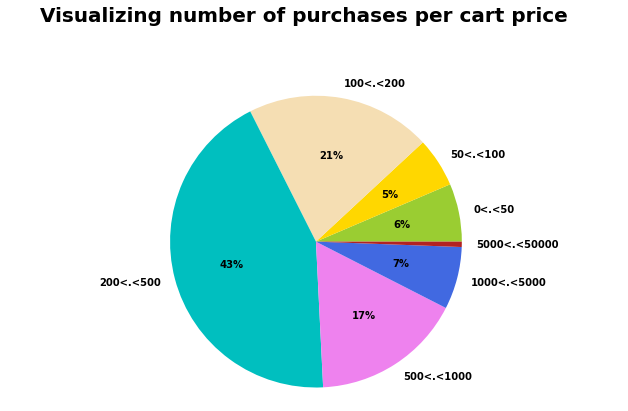

In [25]:
#distribution of orders with respect to the total order amount
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = cart_price[(cart_price['Cart Price'] < price) &
                       (cart_price['Cart Price'] > price_range[i-1])]['Cart Price'].count()
    count_price.append(val)

# Visualizing number of purchases per Cart price       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Visualizing number of purchases per cart price", ha='center', fontsize =20);

##### As we can clearly see that 43% of the total purchases have a total cart price in between 200 and 500 currency and around 60% of the total orders have a total cart price more than 200 currency 

##  Distribution of orders for different Customers

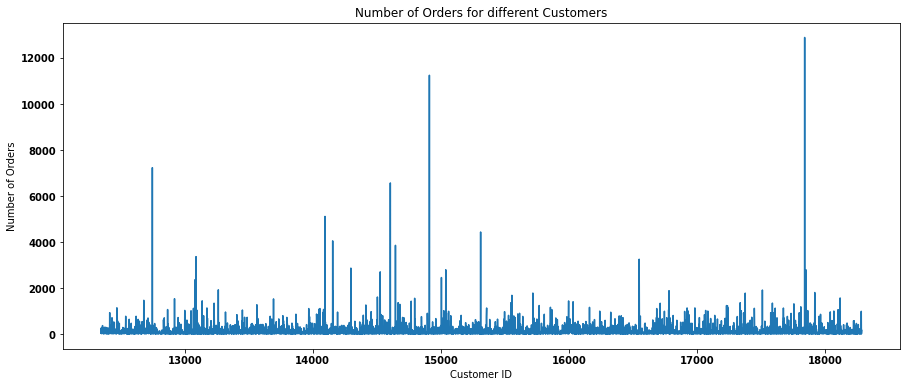

In [26]:
orders = clean_df.groupby(by=['Customer ID'], as_index=False)['Invoice'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders['Customer ID'], orders['Invoice'])
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [27]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='Invoice', ascending=False).head()

The TOP 5 customers with most number of orders...


,Customer ID,Invoice
5436,17841.00,12890
2541,14911.00,11247
400,12748.00,7230
2239,14606.00,6566
1732,14096.00,5111


## Exploring Patterns for Each country

#### grouping orders by country

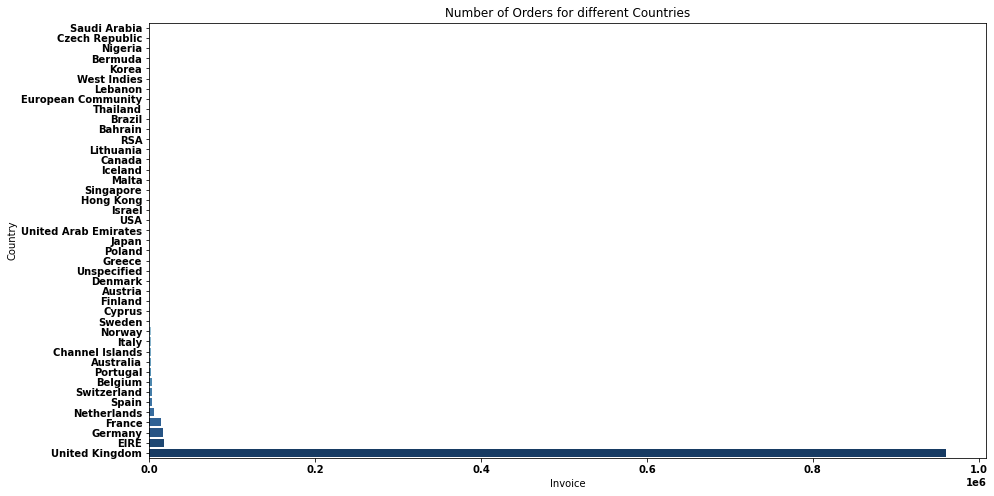

In [28]:
group_orders_by_country = clean_df.groupby('Country')['Invoice'].count().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Number of Orders for different Countries')
plt.show()

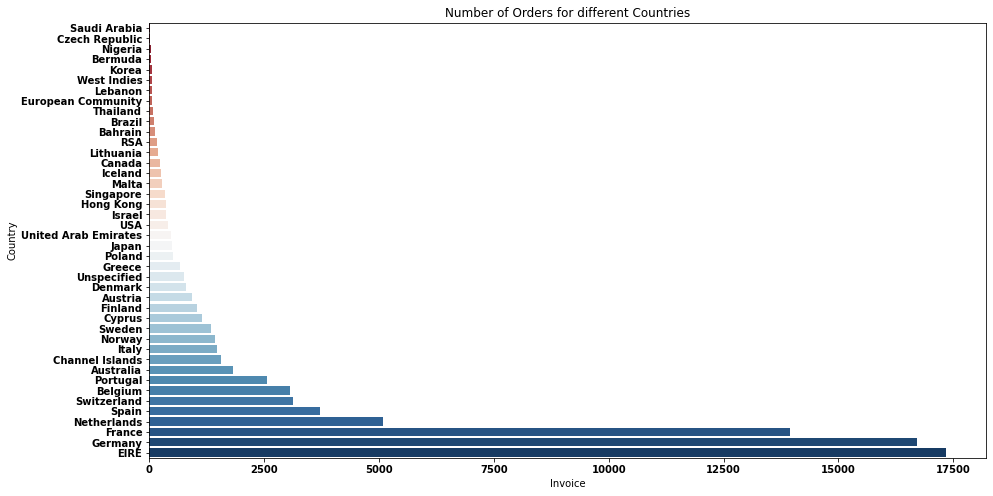

In [29]:
group_orders_by_country = clean_df.groupby('Country')['Invoice'].count().sort_values()
del group_orders_by_country['United Kingdom'] 

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Number of Orders for different Countries')
plt.show()

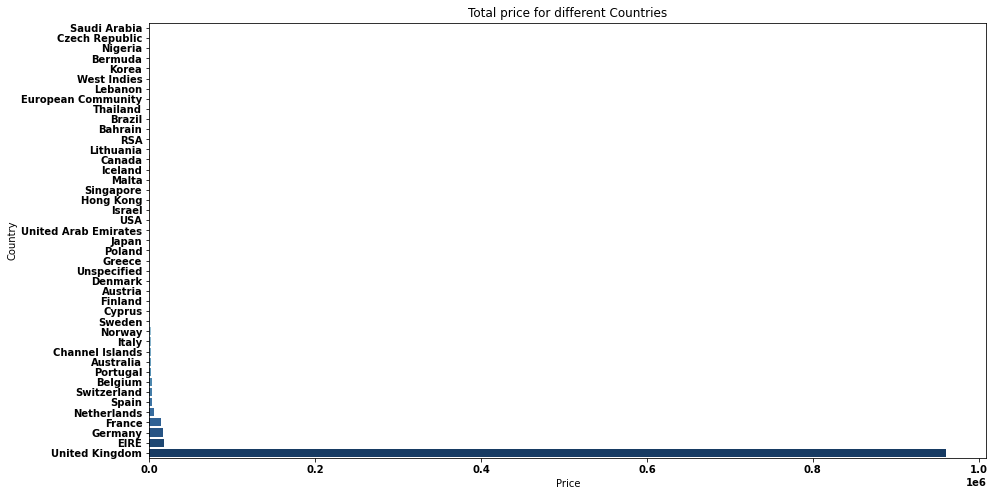

In [30]:
group_orders_by_country = clean_df.groupby('Country')['Price'].count().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Total price for different Countries')
plt.show()

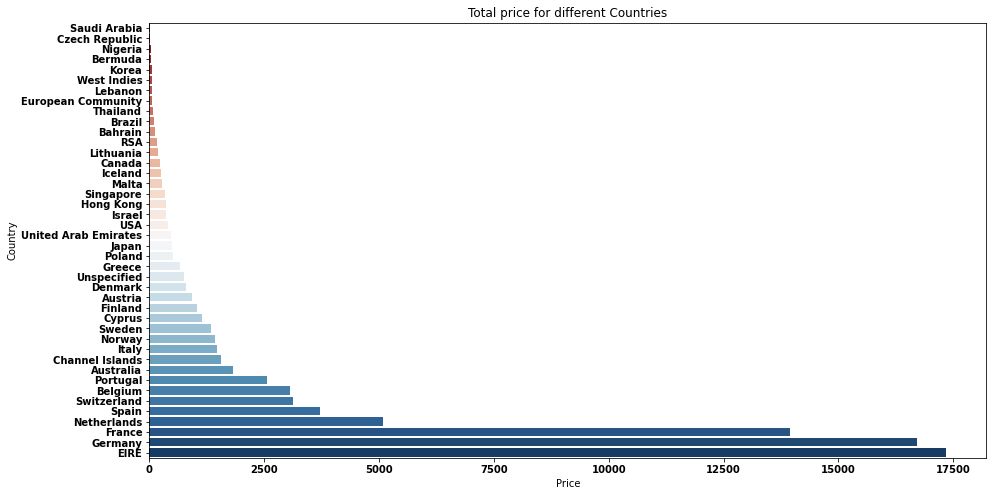

In [31]:
group_orders_by_country = clean_df.groupby('Country')['Price'].count().sort_values()
del group_orders_by_country['United Kingdom'] 

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Total price for different Countries')
plt.show()

# Creating Year_month, Month, Day, Hour columns from DateTime

In [32]:
clean_df.insert(loc=2, column='Year_Month', value=clean_df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
clean_df.insert(loc=3, column='Month', value=clean_df.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
clean_df.insert(loc=4, column='Day', value=(clean_df.InvoiceDate.dt.dayofweek)+1)
clean_df.insert(loc=5, column='Hour', value=clean_df.InvoiceDate.dt.hour)

In [33]:
clean_df.head()

,Invoice,StockCode,Year_Month,Month,Day,Hour,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
0,489434,85048,200912,12,2,7,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,200912,12,2,7,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,200912,12,2,7,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,200912,12,2,7,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,200912,12,2,7,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [34]:
clean_df['Week'] = clean_df['InvoiceDate'].apply(lambda x: x.strftime('%W'))

clean_df.head()

,Invoice,StockCode,Year_Month,Month,Day,Hour,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price,Week
0,489434,85048,200912,12,2,7,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40,48
1,489434,79323P,200912,12,2,7,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,48
2,489434,79323W,200912,12,2,7,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,48
3,489434,22041,200912,12,2,7,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80,48
4,489434,21232,200912,12,2,7,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00,48


In [35]:
clean_df.rename(index=str, columns={'Day':'Weekday'}, inplace=True)

In [36]:
clean_df['Day'] = clean_df['InvoiceDate'].apply(lambda x: x.strftime('%d'))


In [37]:
cols = list(clean_df.columns.values)
print(cols)

['Invoice', 'StockCode', 'Year_Month', 'Month', 'Weekday', 'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Total_Price', 'Week', 'Day']


In [38]:
clean_df = clean_df[['Invoice', 'StockCode', 'Year_Month', 'Month', 'Week', 'Day', 'Weekday', 'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Total_Price']
]

#### Frequency of orders by Year_month

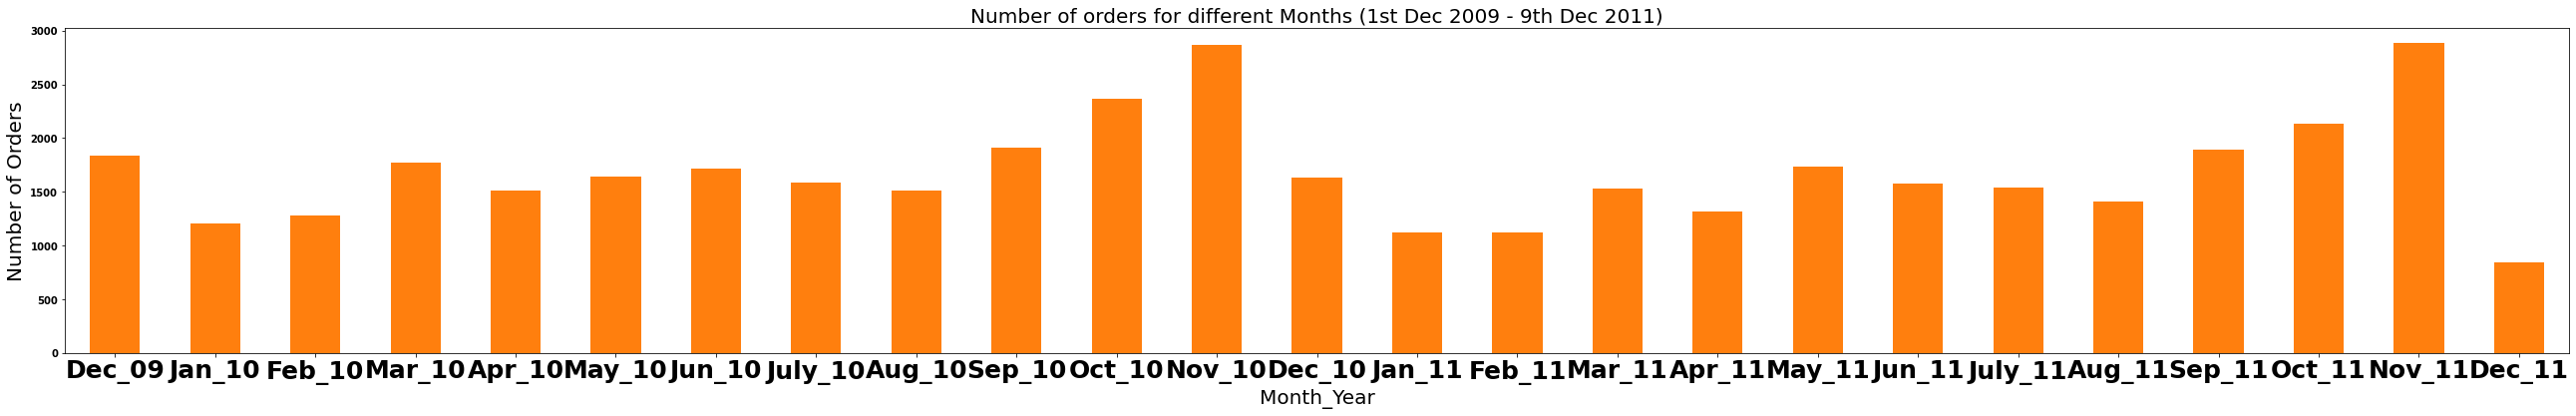

In [39]:
ax = clean_df.groupby('Invoice')['Year_Month'].unique().value_counts().sort_index().plot(kind = 'bar',figsize=(45,6), color = color[1])
ax.set_xlabel('Month_Year',fontsize=20)
ax.set_ylabel('Number of Orders',fontsize=20)
ax.set_title('Number of orders for different Months (1st Dec 2009 - 9th Dec 2011)',fontsize=20)
ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10','Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=25)
plt.show()



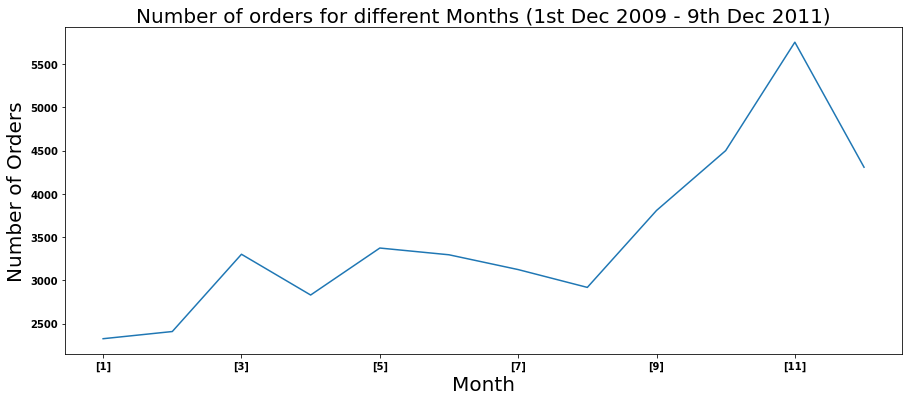

In [40]:
ax = clean_df.groupby('Invoice')['Month'].unique().value_counts().sort_index().plot(kind = 'line',figsize=(15,6))
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Number of Orders',fontsize=20)
ax.set_title('Number of orders for different Months (1st Dec 2009 - 9th Dec 2011)',fontsize=20)
#ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10','Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=25)
plt.show()

## The most popular month of the year is November

In [41]:
#No of orders per day
clean_df.head()

,Invoice,StockCode,Year_Month,Month,Week,Day,Weekday,Hour,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
0,489434,85048,200912,12,48,01,2,7,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,200912,12,48,01,2,7,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,200912,12,48,01,2,7,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,200912,12,48,01,2,7,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,200912,12,48,01,2,7,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


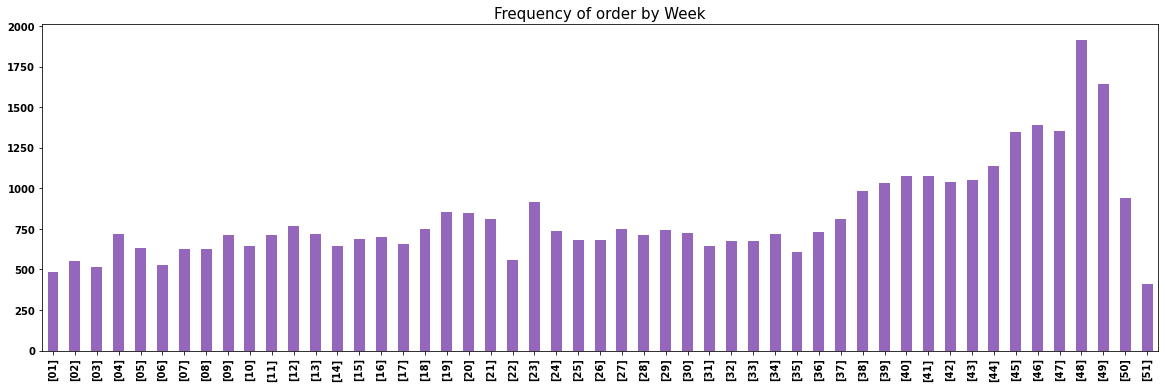

In [42]:
#number of invoices per week, 49th week has the highest number of invoices
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Week", fontsize=15)
InvoiceDate = clean_df.groupby(['Invoice'])['Week'].unique()
ax = InvoiceDate.value_counts().sort_index().plot(kind = 'bar',figsize=(20,6), color = color[4])
plt.show()

In [43]:
clean_df['Day'].unique()


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '13', '14', '15', '16', '17', '18', '20', '21', '22', '23', '12',
       '19', '24', '25', '26', '27', '28', '29', '31', '30'], dtype=object)

<AxesSubplot:title={'center':'Frequency of order by Day'}>

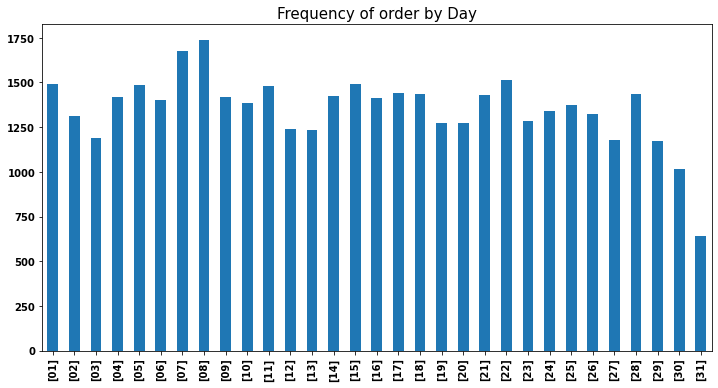

In [44]:
#frequency of orders by day of the month
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Day", fontsize=15)
InvoiceDate = clean_df.groupby(['Invoice'])['Day'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

#### We can see that no orders were made on a Saturday

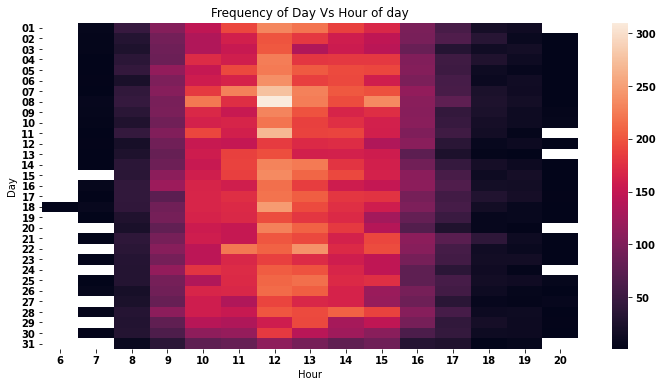

In [45]:
#grouping Invoice by Day and Hour and plotting it on a heatmap
grouped_df  = clean_df.groupby(["Day", "Hour"])["Invoice"].unique().reset_index()
grouped_df["Invoice"] = grouped_df["Invoice"].apply(len)

grouped_df = grouped_df.pivot('Day', 'Hour', 'Invoice')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day Vs Hour of day")
plt.show()

### This shows that people tend to order mostly around 11am to 2pm , this must be because of the lunch hours free time 

<AxesSubplot:title={'center':'Frequency of order by Weekday'}>

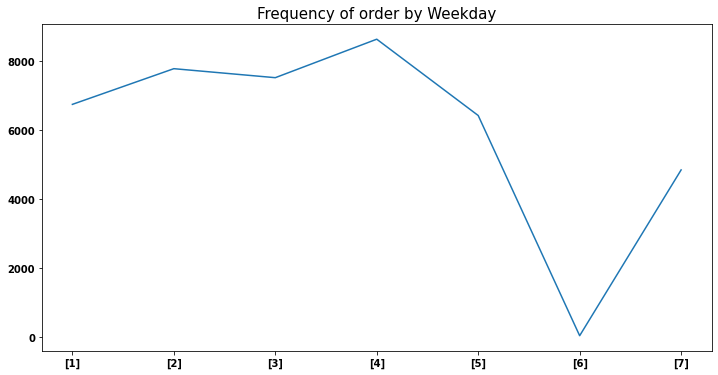

In [46]:
#frequency of orders by days of the week
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Weekday", fontsize=15)
InvoiceDate = clean_df.groupby(['Invoice'])['Weekday'].unique()
InvoiceDate.value_counts().sort_index().plot.line()


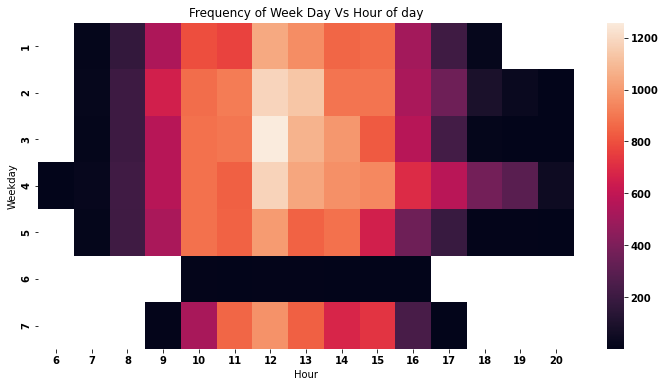

In [47]:
#grouping Invoice by Day and Hour and plotting it on a heatmap
grouped_df_2  = clean_df.groupby(["Weekday", "Hour"])["Invoice"].unique().reset_index()
grouped_df_2["Invoice"] = grouped_df_2["Invoice"].apply(len)

grouped_df_2 = grouped_df_2.pivot('Weekday', 'Hour', 'Invoice')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df_2)
plt.title("Frequency of Week Day Vs Hour of day")
plt.show()

# Now we will look for patterns in the Price of a product

In [48]:
#removing all the rows with negative price

In [49]:
clean_df = clean_df.loc[(clean_df['Price'] >= 0)]

In [50]:
clean_df.Price.describe()


count   1044416.00
mean          4.07
std          51.38
min           0.00
25%           1.25
50%           2.10
75%           4.13
max       25111.09
Name: Price, dtype: float64

In [51]:
#minimum price of a product is zero , this means many items must have been sold for free

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


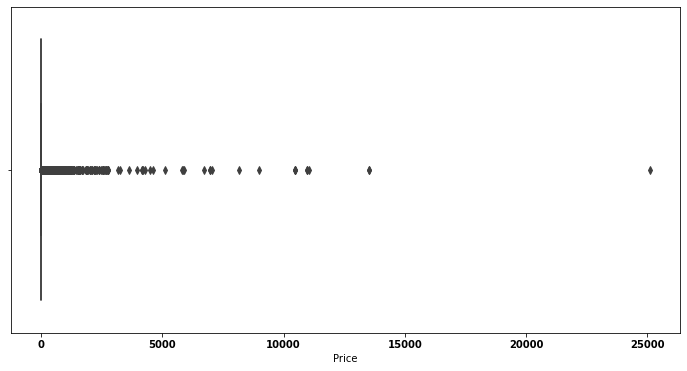

In [52]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(clean_df.Price)
plt.show()


In [53]:
free_items = clean_df.loc[(clean_df['Price'] == 0)]


In [54]:
#there are 2674 items which have ) price and don't have a customer id assigned to them
free_items['Customer ID'].isnull().sum()

2674

In [55]:
#removing those items
free_items = free_items[free_items['Customer ID'].notna()]

In [56]:
#there were 71 transactions with free items
len(free_items)

71

In [57]:
free_items.Year_Month.value_counts().sort_index()


200912     7
201001     3
201002     2
201003     1
201004     3
201006     3
201007     1
201008     1
201009     3
201010     2
201011     4
201012     4
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: Year_Month, dtype: int64

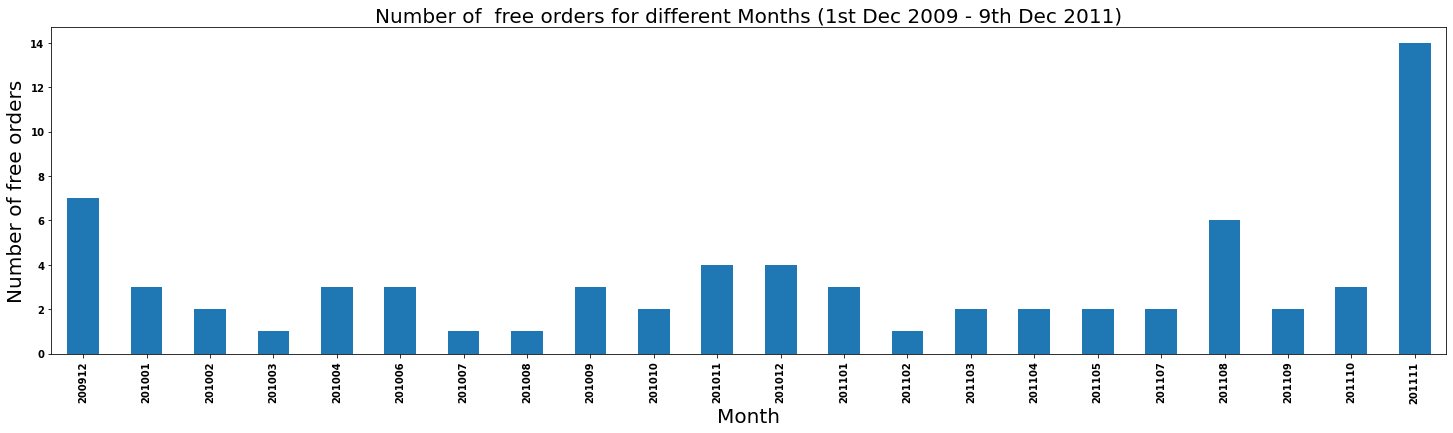

In [58]:
ax = free_items.Year_Month.value_counts().sort_index().plot(kind = 'bar',figsize=(25,6), color=color[0])
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Number of free orders',fontsize=20)
ax.set_title('Number of  free orders for different Months (1st Dec 2009 - 9th Dec 2011)',fontsize=20)
#ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10','Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=25)
plt.show()

### It is not clear why there are FREE items given to certain customers
### so the Store gave away maximum no of free items on the month of November 2011
### The company gave out 2-4 times FREE items to customers each month (Except in June 2011) on average.


In [60]:
clean_df.shape

(1044416, 15)

In [61]:
df_products = pd.DataFrame(clean_df['Description'].unique()).rename(columns = {0:'Description'})

In [63]:
df_products.head()

,Description
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,PINK CHERRY LIGHTS
2,WHITE CHERRY LIGHTS
3,"RECORD FRAME 7"" SINGLE SIZE"
4,STRAWBERRY CERAMIC TRINKET BOX


In [75]:
for i in df_products['Description'][0:10]:
    print(i)
print(type(i))

15CM CHRISTMAS GLASS BALL 20 LIGHTS
PINK CHERRY LIGHTS
 WHITE CHERRY LIGHTS
RECORD FRAME 7" SINGLE SIZE 
STRAWBERRY CERAMIC TRINKET BOX
PINK DOUGHNUT TRINKET POT 
SAVE THE PLANET MUG
FANCY FONT HOME SWEET HOME DOORMAT
CAT BOWL 
DOG BOWL , CHASING BALL DESIGN
<class 'str'>


In [144]:
import nltk
is_noun = lambda pos: pos[:2] == 'NN'

"""function to extract the keywords(nouns) from the description column of the dataframe"""
def keywords_inventory(dataframe, column = 'Description'):

    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in df_products[column][:]:
        if pd.isnull(s): continue
        #print(type(s))
        if type(s) == str:
            #print(s)
            lines = s.lower()
            tokenized = nltk.word_tokenize(lines)
            nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

        for t in nouns:
            t = t.lower() ; 
            root = stemmer.stem(t)
            if root in keywords_roots:                
                keywords_roots[root].add(t)
                count_keywords[root] += 1                
            else:
                keywords_roots[root] = {t}
                count_keywords[root] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    key = k ; min_length = len(k)            
            category_keys.append(key)
            keywords_select[s] = key
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]

    print("Nb of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [145]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

Nb of keywords in variable 'Description': 1829


In [133]:
#type(df_products['Description'])
#df_products['Description'][3921]

'CAROUSEL PONIES BABY BIB'

In [150]:
keywords_roots['decor']

{'decoration', 'decorations', 'decorative'}

In [157]:
len(keywords)

1829

In [151]:
s = {'g', 'e', 'e', 'k', 's'}
t = 'm'
  
# adding tuple t to set s.
s.add(t)
  
print(s)

{'e', 's', 'k', 'm', 'g'}


In [152]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

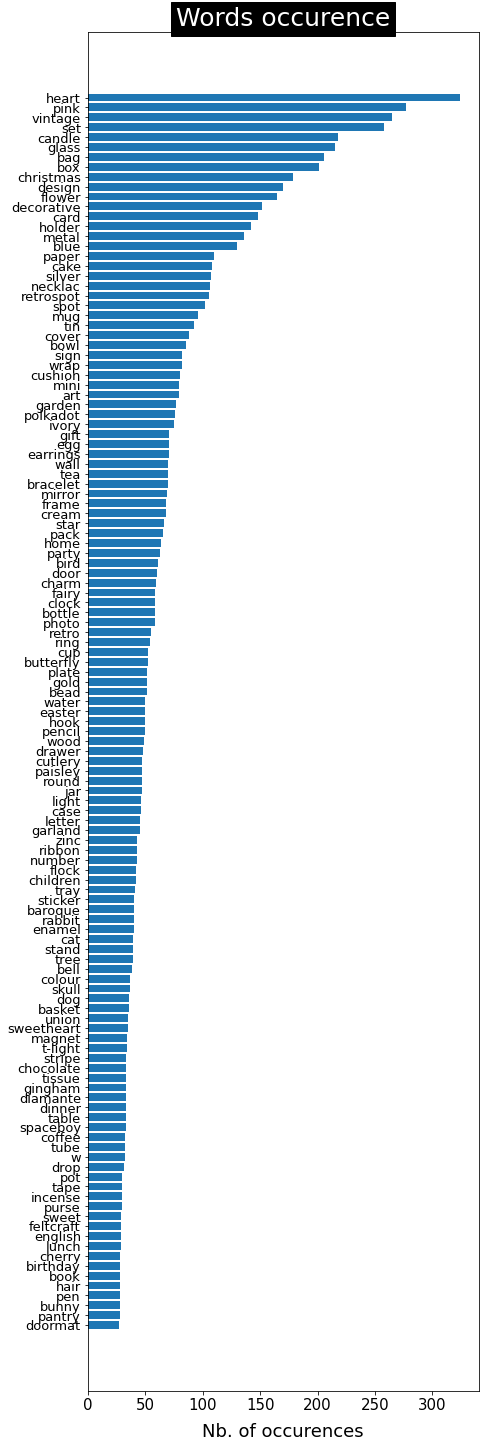

In [155]:
"""Shows the occurences of the keywords"""
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [169]:
irr_words = [w for w, v in count_keywords.items() if len(w) < 3 or v < 15 ]
len(irr_words)

1596

## 1829 keywords found with most frequent keywords occuring more than 200 times (products) 
###### Some keywords don't give out much info for example : colours like red, green blue etc


In [172]:
keywords_list = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    keywords_list.append([word, v])
    
products_list.sort(key = lambda x:x[1], reverse = True)
print('Preserved Key Words:', len(keywords_list))

Preserved Key Words: 263


In [174]:
keywords_list[0:10]

[['glass', 215],
 ['ball', 25],
 ['light', 46],
 ['cherry', 28],
 ['frame', 68],
 ['trinket', 23],
 ['box', 201],
 ['pot', 30],
 ['mug', 96],
 ['font', 18]]

### conclusion in pdf
# The end # 


In [182]:
products_list

array(['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS',
       ' WHITE CHERRY LIGHTS', ..., 'SET 10 CARDS SWIRLY XMAS TREE 17104',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [179]:
products_list = clean_df['Description'].unique()
X = pd.DataFrame()
for key, occurence in keywords_list:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), products_list))


TypeError: argument of type 'float' is not iterable

In [184]:
CREAM HANGING HEART T-LIGHT HOLDER
y = list(map(lambda x:int(key.upper() in x), str('CREAM HANGING HEART T-LIGHT HOLDER')))

SyntaxError: invalid syntax (<ipython-input-184-2b1ffd8adc66>, line 1)